In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading the data from csv file, changing the year column into date time and making it the index.
df_time= pd.read_csv('/content/Region_merged.csv', parse_dates=['Year'])
df_time.head()

,Unnamed: 0,Entity,Code,Year,Substance use disorder(+70 yrs),Substance use disorder(50-69 yrs),Substance use disorder(15-49 yrs),Substance use disorder(Under 5 yrs),Sustance use disorder(5-14 yrs),Death_Cocaine,Death_Illicit_drugs,Death_Opioid,Death_Alchohol,Death_Other_drugs,Death_Amphetamine,Depressive_disorders,Anxiety_disorders,Bipolar_disorders,Eating_disorders,Schizophrenia,ADHD,Conduct_disorders,Other_mental_disorder,ideopathic_intellectual_disability,Autistic_Spectrum_disorders,country,region
0,0,Algeria,DZA,1990-01-01,29.228376,57.010318,198.782354,0.0,0.0,4.748688,217.565473,163.206901,67.455575,46.344628,3.265256,717110.878267,1.086603e+06,167109.048534,45314.330944,34144.870694,321138.811673,286496.027151,356194.769628,436260.063074,88428.266328,Algeria,Northern Africa
1,1,Algeria,DZA,1991-01-01,31.480193,59.925538,214.634182,0.0,0.0,5.048505,235.863017,178.396783,70.176895,49.005712,3.412017,739787.267737,1.123887e+06,172962.912822,46454.489839,35380.945910,330633.206286,294439.857587,369577.670959,453157.453569,90734.813564,Algeria,Northern Africa
2,2,Algeria,DZA,1992-01-01,33.800576,63.346701,233.077626,0.0,0.0,5.405902,256.835122,195.716118,73.389781,52.110462,3.602640,763249.045221,1.161524e+06,178946.231166,47636.007696,36646.930910,339968.267058,302273.026515,383173.239231,469229.532850,92984.227517,Algeria,Northern Africa
3,3,Algeria,DZA,1993-01-01,36.136963,67.339998,253.957402,0.0,0.0,5.809889,280.539351,215.362399,76.895011,55.546879,3.820185,787085.928369,1.199467e+06,185081.732750,48991.139844,37953.800962,349072.117645,309875.085430,397026.661732,484072.303679,95164.282428,Algeria,Northern Africa
4,4,Algeria,DZA,1994-01-01,38.422563,70.230134,284.434950,0.0,0.0,6.321724,311.720894,241.143549,81.366753,60.147699,4.107921,811786.933463,1.237503e+06,191356.654128,50333.457322,39302.924501,357847.520639,317126.962255,411135.399846,497283.554927,97265.874095,Algeria,Northern Africa


In [ ]:
#previewing the data
df_time.tail()

,Unnamed: 0,Entity,Code,Year,Substance use disorder(+70 yrs),Substance use disorder(50-69 yrs),Substance use disorder(15-49 yrs),Substance use disorder(Under 5 yrs),Sustance use disorder(5-14 yrs),Death_Cocaine,Death_Illicit_drugs,Death_Opioid,Death_Alchohol,Death_Other_drugs,Death_Amphetamine,Depressive_disorders,Anxiety_disorders,Bipolar_disorders,Eating_disorders,Schizophrenia,ADHD,Conduct_disorders,Other_mental_disorder,ideopathic_intellectual_disability,Autistic_Spectrum_disorders,country,region
1423,1423,Zimbabwe,ZWE,2013-01-01,18.838860,87.285038,196.004092,0.0,0.0,0.656943,228.478036,117.946787,73.649954,109.513137,0.361169,303564.603590,377541.620434,71122.159628,16235.003871,15565.152707,210350.697148,144156.524460,194002.730586,99425.485097,60984.988655,Zimbabwe,Eastern Africa
1424,1424,Zimbabwe,ZWE,2014-01-01,19.137955,88.421400,197.802713,0.0,0.0,0.669353,231.901939,119.529282,73.460128,111.333454,0.369850,311665.769283,385031.205355,72566.269327,16605.970296,15986.101556,213622.951847,146122.410660,198557.467336,99742.223209,62057.832580,Zimbabwe,Eastern Africa
1425,1425,Zimbabwe,ZWE,2015-01-01,19.737721,90.955396,204.039917,0.0,0.0,0.689805,240.127147,123.365641,74.605887,115.687867,0.383834,320638.507158,393084.829236,74117.733893,17069.977332,16444.046590,217156.823330,148209.419063,203412.785676,99462.918502,63163.902219,Zimbabwe,Eastern Africa
1426,1426,Zimbabwe,ZWE,2016-01-01,20.438139,93.741546,210.088148,0.0,0.0,0.715312,248.360041,127.671737,75.907792,119.572969,0.400023,330437.353798,401600.055980,75746.008181,17627.307296,16931.534667,220904.661962,150426.095394,208495.121769,98416.422432,64283.442262,Zimbabwe,Eastern Africa
1427,1427,Zimbabwe,ZWE,2017-01-01,21.135722,96.488545,215.370022,0.0,0.0,0.740291,255.801950,131.481211,77.192339,123.164037,0.416411,340583.157405,410547.032168,77449.034586,18361.897783,17454.118863,224837.356874,152765.260341,213783.116286,96459.299972,65415.939154,Zimbabwe,Eastern Africa


[Text(0.5, 1.0, 'Trend on drug abuse for age group +70 yrs')]

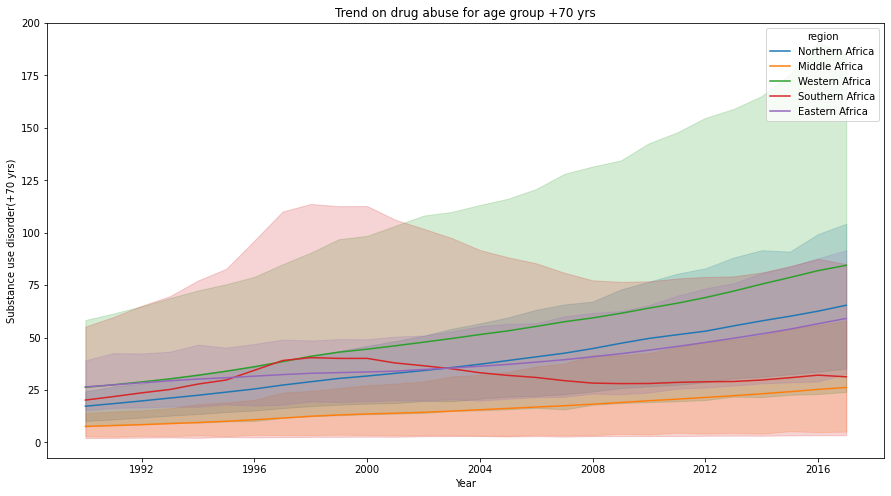

In [ ]:
#ck['Substance use disorder(+70 yrs)'].plot(legend=True)
plt.figure(figsize=(15,8))
sns.lineplot(x = "Year", y = "Substance use disorder(+70 yrs)",hue='region',data=df_time).set(title="Trend on drug abuse for age group +70 yrs")

[Text(0.5, 1.0, 'Trend on drug abuse for age group 15-49yrs')]

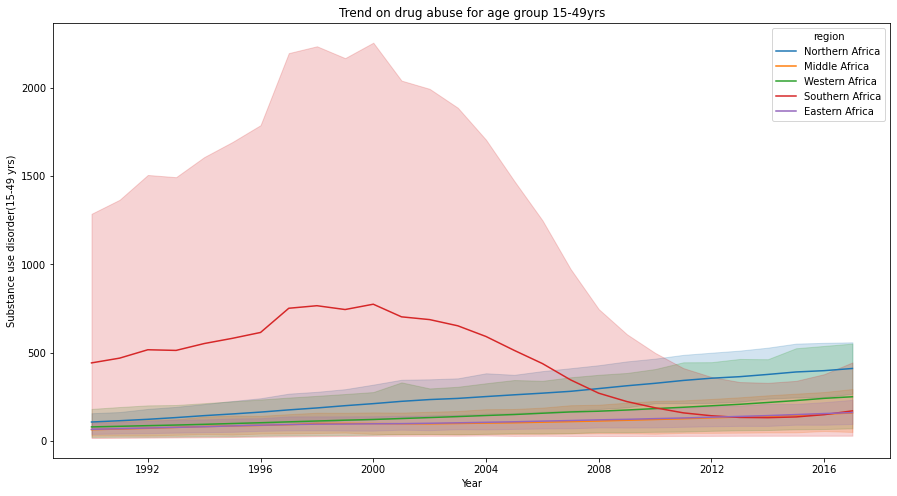

In [ ]:
# Substance use disorder(15-49 yrs)']
plt.figure(figsize=(15,8))
sns.lineplot(x = "Year", y = "Substance use disorder(15-49 yrs)",hue='region',data=df_time).set(title="Trend on drug abuse for age group 15-49yrs")

In [ ]:
# anxiety

[Text(0.5, 1.0, 'Trend on drug use for age group 50-69')]

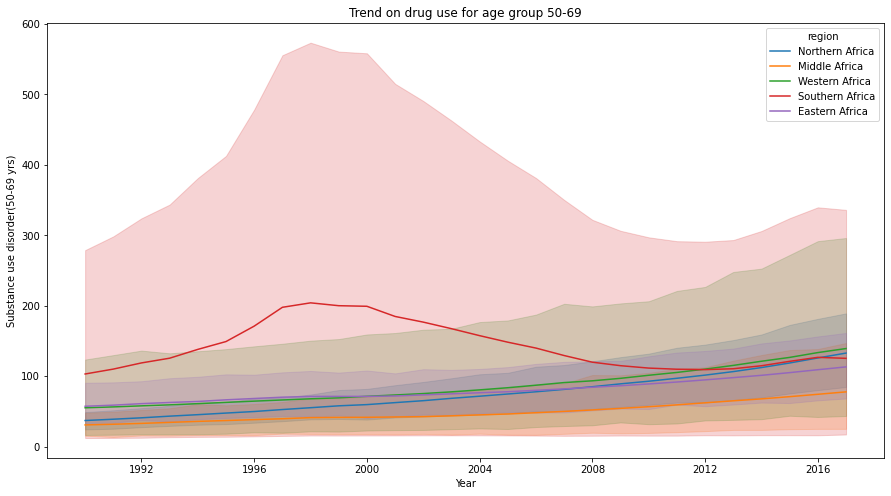

In [ ]:
# Substance use disorder(50-69 yrs)']
plt.figure(figsize=(15,8))
sns.lineplot(x = "Year", y = "Substance use disorder(50-69 yrs)",hue='region',data=df_time).set(title="Trend on drug abuse for age group 50-69")

[Text(0.5, 1.0, 'Trend of Depressive diorders')]

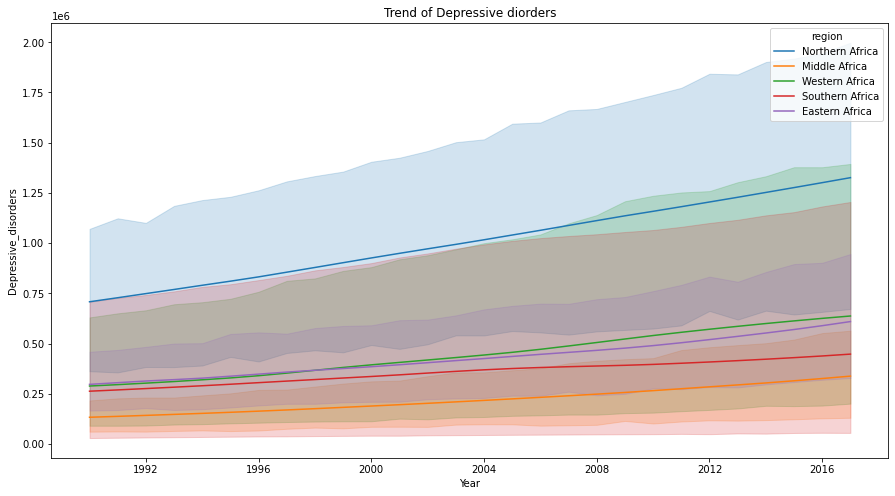

In [ ]:
# timeline of Depressive dissorders per region in Africa since 1990 to 2017 
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='Depressive_disorders',hue='region',data=df_time).set(title="Trend of Depressive disorders")

[Text(0.5, 1.0, 'Trend of Anxiety disorder')]

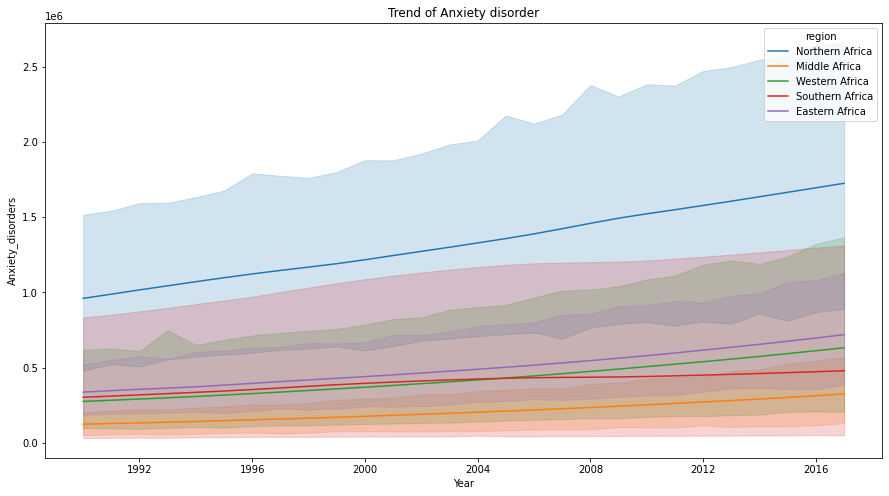

In [ ]:
# timeline of Anxiety dissorders per region in Africa since 1990 to 2017 
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='Anxiety_disorders',hue='region',data=df_time).set(title="Trend of Anxiety disorder")

[Text(0.5, 1.0, 'Trend of Illicit drug deaths')]

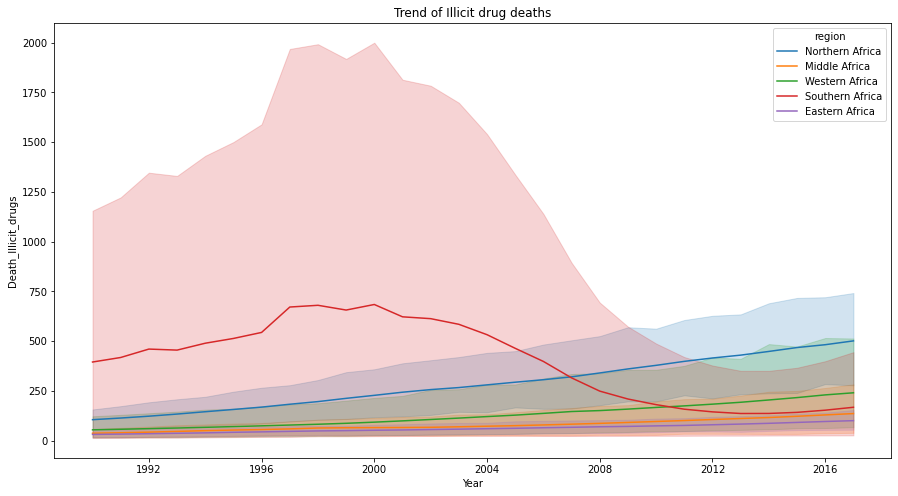

In [ ]:
# Substance use illicit drug
plt.figure(figsize=(15,8))
sns.lineplot(x = "Year", y = "Death_Illicit_drugs",hue='region',data=df_time).set(title="Trend of Illicit drug deaths")

[Text(0.5, 1.0, 'Trend of Alchohol deaths')]

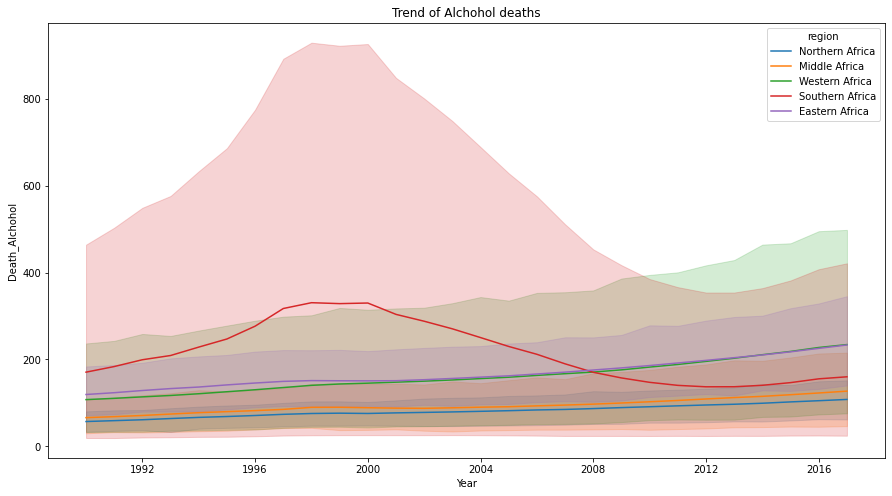

In [ ]:
# Substance use alchohol
plt.figure(figsize=(15,8))
sns.lineplot(x = "Year", y = "Death_Alchohol",hue='region',data=df_time).set(title="Trend of Alchohol deaths")

[Text(0.5, 1.0, 'Trend of Opioid deaths')]

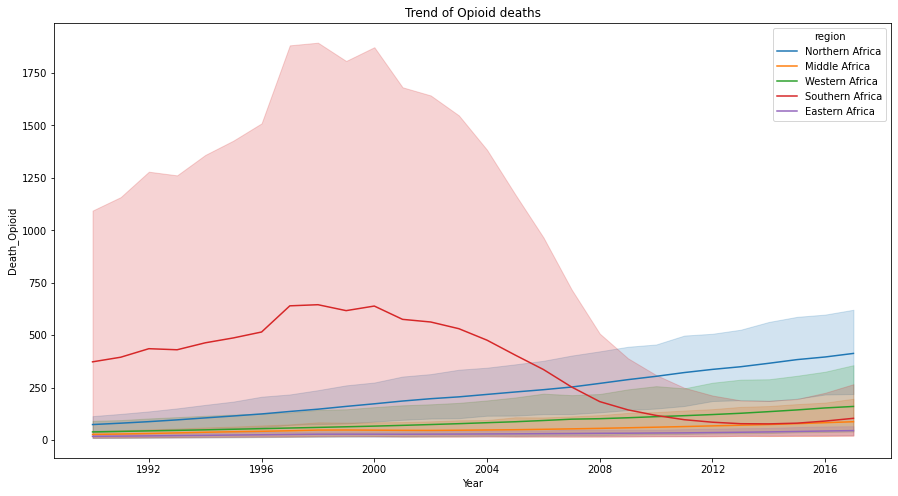

In [ ]:
# Regional trend per year for deaths by Opioid
plt.figure(figsize=(15,8))
sns.lineplot(x = "Year", y = "Death_Opioid",hue='region',data=df_time).set(title="Trend of Opioid deaths")

## Timeline on Country Kenya

In [ ]:
# reading the dataset for individual countries
df_another_time= pd.read_csv('/content/Region_merged.csv', parse_dates=['Year'], index_col='Year')

In [ ]:
# selecting a country to see the trend over the years
df_country=df_another_time[(df_another_time.Entity=='Kenya')]
df_country.head()

,Unnamed: 0,Entity,Code,Substance use disorder(+70 yrs),Substance use disorder(50-69 yrs),Substance use disorder(15-49 yrs),Substance use disorder(Under 5 yrs),Sustance use disorder(5-14 yrs),Death_Cocaine,Death_Illicit_drugs,Death_Opioid,Death_Alchohol,Death_Other_drugs,Death_Amphetamine,Depressive_disorders,Anxiety_disorders,Bipolar_disorders,Eating_disorders,Schizophrenia,ADHD,Conduct_disorders,Other_mental_disorder,ideopathic_intellectual_disability,Autistic_Spectrum_disorders,country,region
Year,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-01,644,Kenya,KEN,42.692217,75.834432,84.302394,0.0,0.0,0.890267,27.231593,19.170201,175.597450,6.602675,0.568451,541808.049290,691119.713621,113913.813574,26336.173799,24112.999303,368294.508036,279613.281658,267749.280963,158457.166151,107009.024766,Kenya,Eastern Africa
1991-01-01,645,Kenya,KEN,44.445168,80.066222,89.958427,0.0,0.0,0.968286,29.628080,21.005597,184.841737,7.042542,0.611655,560515.090650,716890.959081,118169.588883,27277.431162,25025.674969,381166.828185,289677.747561,277582.562666,163672.378553,110262.160315,Kenya,Eastern Africa
1992-01-01,646,Kenya,KEN,46.446876,84.954073,96.471492,0.0,0.0,1.059231,32.424900,23.146234,195.447541,7.556957,0.662478,580140.956833,743288.673703,122563.226159,28275.504473,25966.915751,394222.962779,299812.477914,287768.032903,168871.421329,113552.864122,Kenya,Eastern Africa
1993-01-01,647,Kenya,KEN,48.573270,90.172900,103.110219,0.0,0.0,1.156853,35.411121,25.429293,206.445268,8.107725,0.717250,600762.191697,770209.153018,127114.019941,29281.683174,26942.374595,407256.236671,309676.580330,298390.682049,173950.064955,116859.746281,Kenya,Eastern Africa
1994-01-01,648,Kenya,KEN,50.769874,95.503872,110.094485,0.0,0.0,1.262531,38.599988,27.873475,217.768243,8.687287,0.776696,622253.882459,797593.368406,131825.760999,30365.670787,27948.255866,420227.611040,319348.203320,309410.200435,178830.485602,120186.406443,Kenya,Eastern Africa


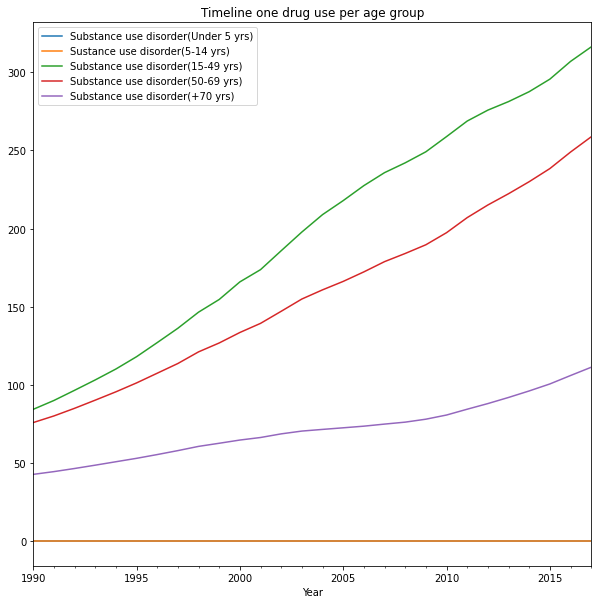

In [ ]:
# timeline comparison on the age groups over the years
df_country[['Substance use disorder(Under 5 yrs)','Sustance use disorder(5-14 yrs)','Substance use disorder(15-49 yrs)',
            'Substance use disorder(50-69 yrs)','Substance use disorder(+70 yrs)']].plot(figsize=(10,10),title='Timeline one drug use per age group')

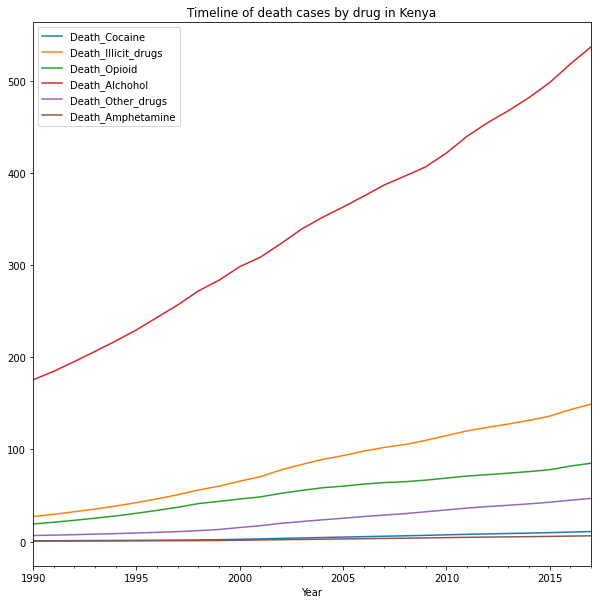

In [ ]:
# timeline of the trend of the drugs over the years
df_country[['Death_Cocaine','Death_Illicit_drugs','Death_Opioid',
            'Death_Alchohol','Death_Other_drugs','Death_Amphetamine']].plot(figsize=(10,10),title='Timeline of death cases by drug in Kenya')

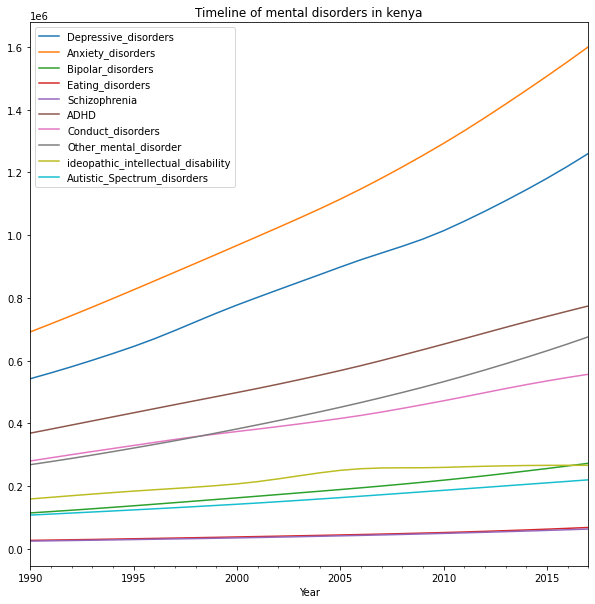

In [ ]:
# timeline on the trend of mental illnesses per illness over time
df_country[['Depressive_disorders','Anxiety_disorders',
            'Bipolar_disorders','Eating_disorders','Schizophrenia','ADHD',
            'Conduct_disorders','Other_mental_disorder',
            'ideopathic_intellectual_disability','Autistic_Spectrum_disorders']].plot(figsize=(10,10),title='Timeline of mental disorders in kenya')

##forecast for Kenya Alchohol use 

In [ ]:
pip install pystan fbprophet

In [ ]:
# importing the data set and the prophet library
from fbprophet import Prophet
df_yet_another_time= pd.read_csv('/content/Region_merged.csv', parse_dates=['Year'])
df_my_country=df_yet_another_time[(df_yet_another_time.Entity=='Kenya')]
data= df_my_country[['Year','Death_Alchohol']]
data.columns=['ds','y']
data.head()

,ds,y
644,1990-01-01,175.597450
645,1991-01-01,184.841737
646,1992-01-01,195.447541
647,1993-01-01,206.445268
648,1994-01-01,217.768243


In [ ]:
# Training the model
m = Prophet(interval_width=0.95,daily_seasonality=True)
model = m.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


In [ ]:
#forecast
future=m.make_future_dataframe(periods=10,freq='Y')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,6.708977,171.387320,177.711347,6.708977,6.708977,167.571372,167.571372,167.571372,105.767483,105.767483,105.767483,61.803889,61.803889,61.803889,0.0,0.0,0.0,174.280349
1,1991-01-01,17.421364,182.534746,188.196332,17.421364,17.421364,167.851750,167.851750,167.851750,105.767483,105.767483,105.767483,62.084267,62.084267,62.084267,0.0,0.0,0.0,185.273115
2,1992-01-01,28.135886,193.658908,199.213424,28.135886,28.135886,168.188141,168.188141,168.188141,105.767483,105.767483,105.767483,62.420658,62.420658,62.420658,0.0,0.0,0.0,196.324027
3,1993-01-01,38.896804,203.239023,208.999271,38.896804,38.896804,167.351173,167.351173,167.351173,105.767483,105.767483,105.767483,61.583690,61.583690,61.583690,0.0,0.0,0.0,206.247977
4,1994-01-01,50.630521,215.204091,220.896145,50.630521,50.630521,167.571372,167.571372,167.571372,105.767483,105.767483,105.767483,61.803889,61.803889,61.803889,0.0,0.0,0.0,218.201893


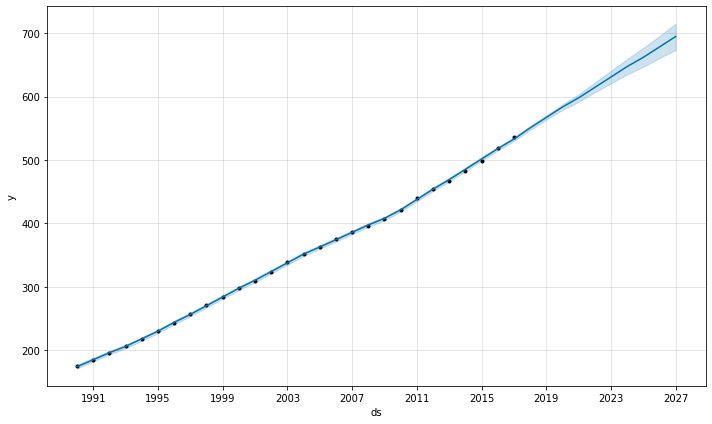

In [ ]:
#the following line graph is the resulting forecast
chart=m.plot(forecast)
#All factory held constant, the forecasted deaths from ALchohol in kenya upto the year 2027 will have a steady rise upto 700 cases per year